<a href="https://colab.research.google.com/github/chrabi/NEW_PYTHON/blob/master/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

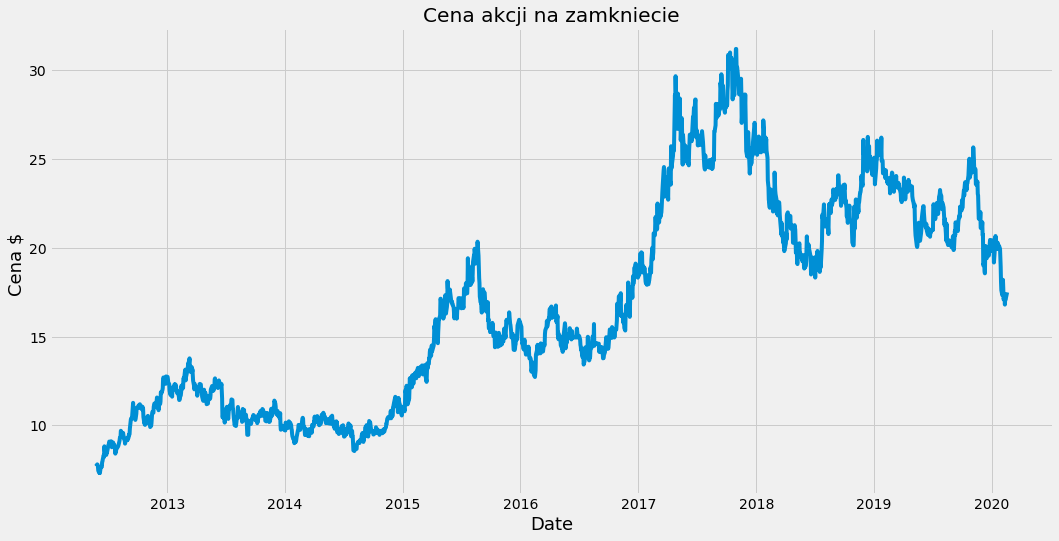

In [18]:
#test program pknorlen PKY1.F
#Description Stock prediction LSTM ( Long short term memory)
# predict Apple past 60 days.
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#get stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2020-02-20')
df2 = web.DataReader('PKY1.F', data_source='yahoo',start='2010-01-01',end='2020-02-20')
df.shape
df2
df2.shape
# chart cosing prize PKNOrlen
plt.figure(figsize=(16,8))
plt.title('Cena akcji na zamkniecie')
plt.plot(df2['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cena $ ',fontsize=18)
plt.show()


In [20]:
#dabta prepare
data=df2.filter(['Close'])
# numpy musi byc zeby przygoowac dane do treningu.
dataset=data.values
# nmery kolumn do danycdo treningu.
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1563

In [21]:
# scalownie danych
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01629524],
       [0.02060992],
       [0.01947889],
       ...,
       [0.4100201 ],
       [0.40876345],
       [0.4261478 ]])

In [22]:
# tworzenie danych do treningu, od 0 do 1563 dlgosc danych
train_data=scaled_data[0:training_data_len,:]
#rozbicie,na x_train i y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01629524, 0.02060992, 0.01947889, 0.01554123, 0.0059484 ,
       0.0004608 , 0.00825235, 0.        , 0.01055629, 0.0160858 ,
       0.01482909, 0.02588807, 0.02768935, 0.03233914, 0.04272788,
       0.0379524 , 0.06312837, 0.05441523, 0.04708445, 0.04545076,
       0.04302111, 0.05303285, 0.04834115, 0.05223694, 0.06329592,
       0.06752681, 0.0663958 , 0.0743549 , 0.07288875, 0.06756872,
       0.0710037 , 0.07498326, 0.06991455, 0.06099195, 0.06279324,
       0.07226039, 0.06811327, 0.06748494, 0.06744304, 0.06199732,
       0.04586963, 0.05495978, 0.05110589, 0.05717997, 0.05973526,
       0.06124331, 0.062123  , 0.06396615, 0.06660522, 0.07653319,
       0.08294236, 0.08424096, 0.08461796, 0.09978219, 0.09509048,
       0.09475539, 0.0932892 , 0.09383379, 0.09467157, 0.07984248])]
[0.07896279365700293]



# New Section